# Harmonic oscillator 

We have an Hamiltonian system
$$\dot{y} = J^{-1} \nabla H(y) $$
with $y = (p,q) \in \mathbb{R}^{2d}$ and $J=\begin{pmatrix}0 & I \\ -I & 0 \end{pmatrix} \in M_{2d}(\mathbb{R})$

In this case  $d=1$ and we have the following hamiltonian
\begin{equation}
H(p,q) = \frac{1}{2}\left(p^2 + q ^2\right)
\end{equation}

Thus

$$
\left\{\begin{matrix}
       \frac{\partial p}{\partial t} &=& - q \\
       \frac{\partial q}{\partial t} &=& p\\
\end{matrix}\right.
$$


### Imports

In [1]:
import sys
sys.path.append('Euler')
import EulerImplicitOscillator as EIO
import parareal as para
import RK2
import RK4
import StormerOscillator as SO
import HamiltonianFunctions as func
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 5]



### Constants

In [2]:
T = 10000
N = 99999
y0 = np.array([0, 1])
delta_t = T/N
dtg = delta_t
dtf = delta_t/100
print("T:",T)
print("N:",N)
print("delta_t:",delta_t)
print("dtg:", dtg)
print("dtf:",dtf)

T: 10000
N: 99999
delta_t: 0.1000010000100001
dtg: 0.1000010000100001
dtf: 0.0010000100001000011


## Computation of solutions

In [3]:
%matplotlib inline

In [4]:
tab_y = para.parareal_bis(func.Oscillator, SO.Stormer,SO.Stormer, T, y0, dtf, dtg, N)

tab_t = np.linspace(0, T, N+2)
sol_ex = np.array([-np.sin(tab_t),np.cos(tab_t)])


k: 1
k: 2
k: 3
k: 4
k: 5
k: 6


## Error computation on parareal algorithm for harmonic oscillator

### Error on y

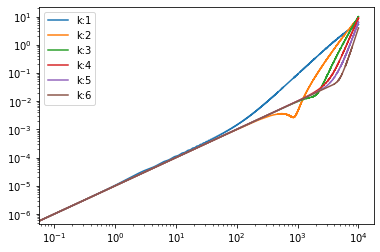

In [5]:
tab_err = para.err(tab_y,sol_ex)

for k in range(2,len(tab_err)):
    plt.loglog(tab_t,np.abs(tab_err[k,:]),label =f"k:{k-1}")
    
plt.legend()

### Error on the Hamiltonian

In [6]:

tab_Ha0 = 0.5 * np.ones(len(tab_y[0]))
#tab_Ha = para.parareal_Ha_Oscillator(func.Oscillator, SO.Stormer,SO.Stormer, T, y0, dtf, dtg, N, epsilon)
tab_Ha = para.Ha_err(tab_y,tab_Ha0,func.HaOscillator)
kmax = len(tab_Ha)




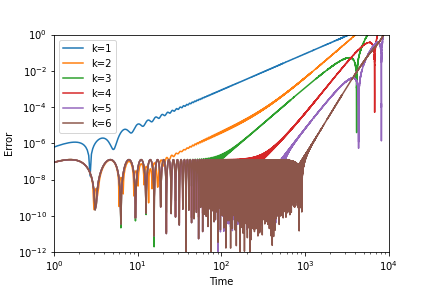

In [7]:
%matplotlib widget
#plt.loglog(tab_t,tab_Ha[0], label ="f solver")
#plt.loglog(tab_t,tab_Ha[1], label ="g solver")

for k in range(2,kmax):
    plt.loglog(tab_t,tab_Ha[k], label =f"k={k-1}")
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.xlim(1,T)
    plt.ylim(10**-12,1)
plt.legend()

In [8]:
#for k in range(2,kmax):
#    slope, intercept = np.polyfit(np.log(tab_t)[1:],np.log(tab_Ha[k])[1:],1)
#    print(f"pente {k-1}", slope)



#slope_1,intercept_1 = np.polyfit(np.log(tab_t)[1:], np.log(tab_Ha[2])[1:],1)
#slope_2,intercept_2= np.polyfit(np.log(tab_t)[201:], np.log(tab_Ha[3])[201:],1)
#slope_3,intercept_3 = np.polyfit(np.log(tab_t)[1001:], np.log(tab_Ha[4])[1001:],1)
#slope_4,intercept_4 = np.polyfit(np.log(tab_t)[1:], np.log(tab_Ha[5])[1:],1)
#slope_5,intercept_5 = np.polyfit(np.log(tab_t)[1:], np.log(tab_Ha[6])[1:],1)


plt.plot(tab_t,np.power(tab_t,2)/10**7,label='t^2')
plt.plot(tab_t,np.power(tab_t,4)/10**14.4,label='t^4')
plt.plot(tab_t,np.power(tab_t,4)/10**15,label='t^4')
plt.plot(tab_t,np.power(tab_t,6)/10**22.5,label='t^6')
plt.plot(tab_t,np.power(tab_t,6)/10**23.3,label='t^6')
plt.plot(tab_t,np.power(tab_t,8)/10**31,label='t^8')

plt.legend()
#print("pente 1",slope_1)
#print("pente 2",slope_2)
#print("pente 3",slope_3)
#print("pente 4",slope_4)
#print("pente 5",slope_5)
